# Forecasting for The Simons Observatory (SO)
## Subhajit Ghosh
### Fisher forecasting, mock likelihood-analysis

In [1]:
%%capture
!pip install mflike
!pip install cobaya_utilities

In [2]:
import sys
import os
import numpy as np
import tempfile

In [3]:
# sys.path.append(os.path.join(os.getcwd(),'/cosmodir/code/CAMB'))
sys.path.append(os.path.join(os.getcwd(),'../../cosmodir/code/CAMB'))
import camb

The code requires CAMB to work. There are also codes that work with CLASS (e.g, https://github.com/brinckmann/montepython_public/) -- but not very Ipython friendly. That's why we are choosing CAMB for this. Also because it uses cobaya.

In [4]:
from cobaya_utilities import fisher

# https://cobaya-utilities.readthedocs.io/en/latest/tutorials/fisher.html

Fixing the fiducial cosmology. Since we do not know the outcome of the measurement, we have to choose a mean value to define the likelihood. Forecasting is all about the error bar -- how precisely you can measure it. The fiducial cosmology is just for reference only.

In [5]:
# Fiducial cosmology parameters
cosmo_params = {
    "cosmomc_theta": 0.0104085,
    "logA": 3.044,
    "ombh2": 0.02237,
    "omch2": 0.1200,
    "ns": 0.9649,
    "tau": 0.0544
}

nuisance_params = {
    "a_tSZ": 3.30,
    "a_kSZ": 1.60,
    "a_p": 6.90,
    "beta_p": 2.08,
    "a_c": 4.90,
    "beta_c": 2.20,
    "a_s": 3.10,
    "a_gtt": 8.70,
    "a_gte": 0.0,
    "a_gee": 0.0,
    "a_psee": 0.0,
    "a_pste": 0.0,
    "xi": 0.10,
    "T_d": 9.60,
}

all_params = {**cosmo_params, **nuisance_params}

In [6]:
# Cobaya settings for the input SO likelihood.
default_likelihood_config = {
    # "input_file": "LAT_simu_sacc_00000.fits",
    "input_file": "LAT_simu_sacc_00044.fits",
    "cov_Bbl_file": "data_sacc_w_covar_and_Bbl.fits",
}
summary = fisher.compute_fisher_matrix("mflike.MFLike", default_likelihood_config, all_params,return_correlation = True)

[install] Installing external packages at '/var/folders/86/jk88n3gs4hs36g1wz1c_92n10t6912/T/cobaya_utilities'
[install] The installation path has been written into the global config file: /Users/sg58477/Library/Application Support/cobaya/config.yaml

likelihood:mflike.MFLike

[install] Checking if dependencies have already been installed...
[install] External dependencies for this component already installed.
[install] Doing nothing.

* Summary * 

[install] All requested components' dependencies correctly installed at /var/folders/86/jk88n3gs4hs36g1wz1c_92n10t6912/T/cobaya_utilities
[camb] `camb` module loaded successfully from /Users/sg58477/work/cosmodir/code/CAMB/camb
[mflike.mflike] Number of bins used: 3087
[mflike.mflike] Initialized!
[mflike.mflike] Computing bandpass at first step, no shifts
[fisher] Computing parameter 'cosmomc_theta' done
[fisher] Computing parameter 'logA' done
[fisher] Computing parameter 'ombh2' done
[fisher] Computing parameter 'omch2' done
[fisher] Comp

Caution: Fisher matrix output in code is actually the **correlation** matrix. The correlation matrix is derived from the covariance matrix which is the **inverse** fisher matrix

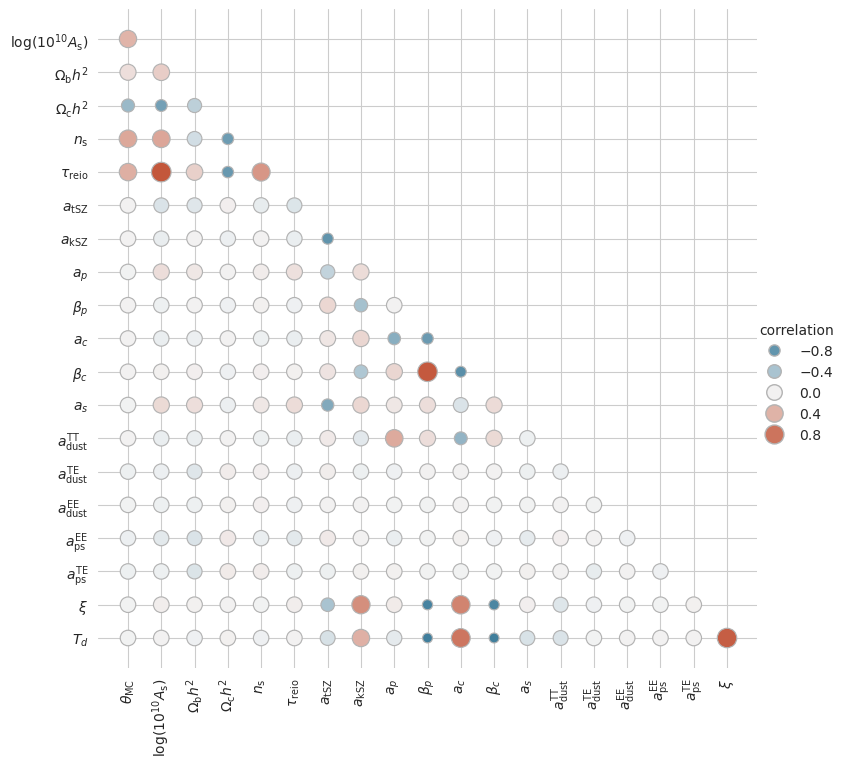

In [7]:
fisher.plot_fisher_matrix();

It tells you about the correlation of different cosmological parameters

Below are precision of the parameters

In [8]:
summary[0]

,value,$\sigma$,S/N,param
$\theta_\mathrm{MC}$,0.010408,0.000001,7407.205627,cosmomc_theta
$\log(10^{10} A_\mathrm{s})$,3.044000,0.018571,163.908142,logA
$\Omega_\mathrm{b}h^2$,0.022370,0.000063,354.530730,ombh2
$\Omega_\mathrm{c}h^2$,0.120000,0.001103,108.822351,omch2
$n_\mathrm{s}$,0.964900,0.003190,302.429787,ns
$\tau_\mathrm{reio}$,0.054400,0.010469,5.196180,tau
$a_\mathrm{tSZ}$,3.300000,0.069043,47.796453,a_tSZ
$a_\mathrm{kSZ}$,1.600000,0.156323,10.235241,a_kSZ
$a_p$,6.900000,0.049758,138.670024,a_p
$\beta_p$,2.080000,0.101970,20.398088,beta_p


## Let's plot the Fisher matrix

In [9]:
# Get covariance matrix from correlation matrix
std = summary[0].to_numpy()[:,1]
corr = summary[1].to_numpy()
cov =  np.multiply(corr,np.outer(std,std)).astype(float)
mean = summary[0].to_numpy()[:,0].astype(float)
par = summary[0].to_numpy()[:,3].astype(str)
label = [i.strip('$') for i in summary[0].index.to_list()]

In [10]:
from normal_corner import normal_corner
#%pip install normal_corner

In [11]:
# fig = normal_corner.normal_corner(cov,mean,label.tolist())

In [12]:
from getdist.gaussian_mixtures import GaussianND
from getdist import plots

In [13]:
samp_so = GaussianND(mean, cov, labels = label, names = par)

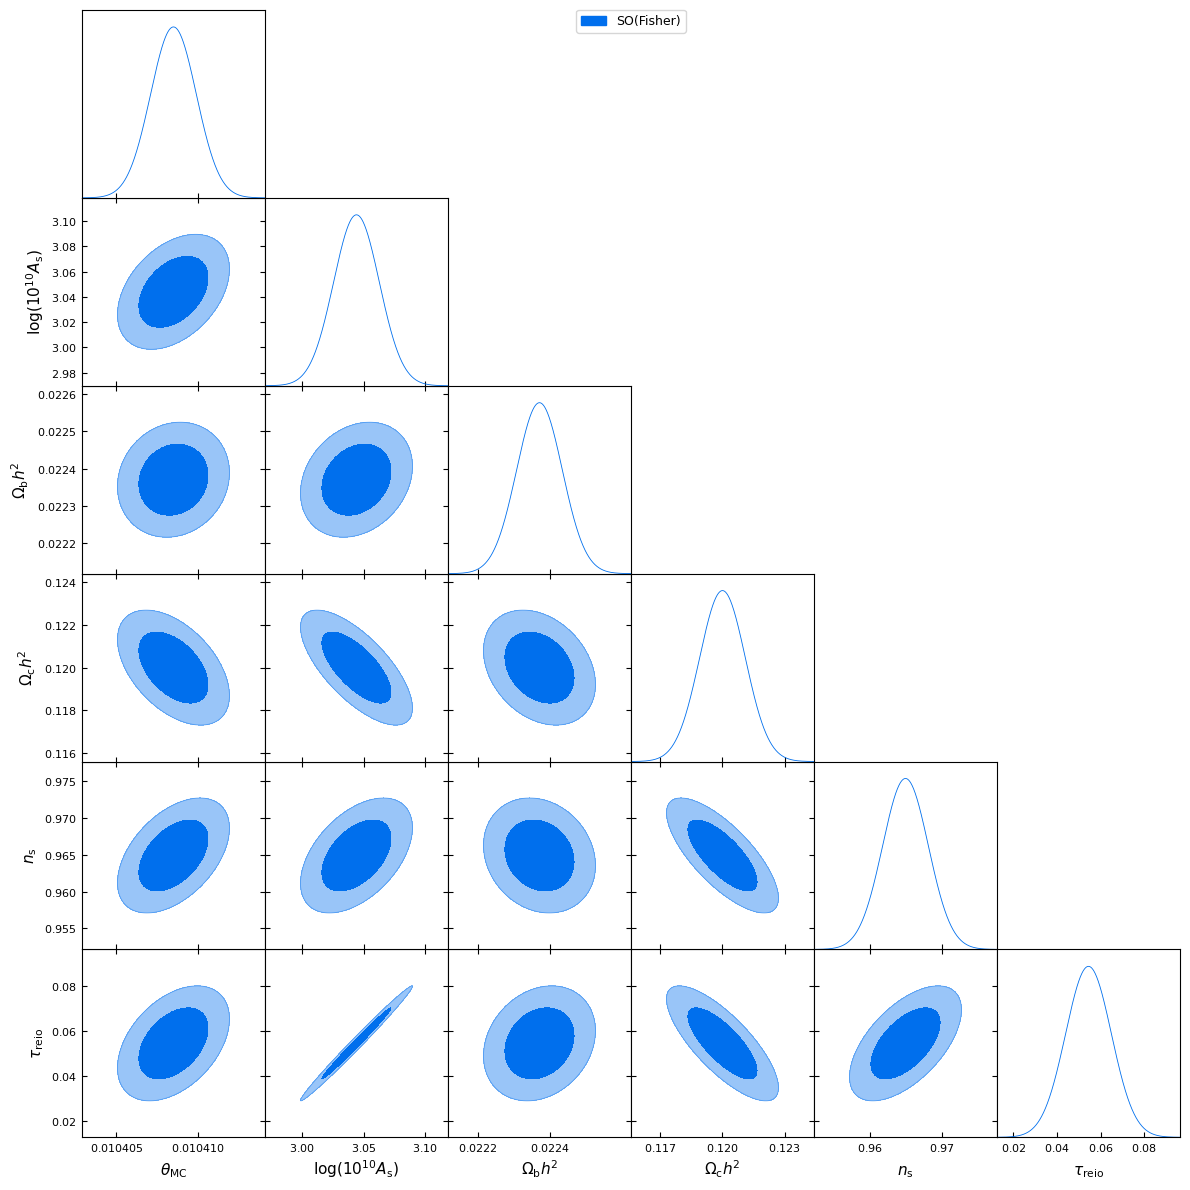

In [14]:
g = plots.get_subplot_plotter()
g.triangle_plot(samp_so, par[:6],filled=True,legend_labels = ['SO(Fisher)'])

##### <font color='red'>Exercise 1:</font>
1. Change \theta with H0 and see how much SO will improve the H0 constraint.
2. Derive the sensitivity (variance & plots) on neutrino mass(mnu) and N_eff(nmu) for SO. Vary them together and one at a time. Derive the variances in each case. Comment on the difference.

### Running actual SO Likelihood w/ cobaya

In [15]:
from cobaya.run import run
from cobaya.yaml import yaml_load_file
import cobaya
from cobaya.install import install
from cobaya import load_samples

In [16]:
mflike_yaml = yaml_load_file("mflike_example_wcov.yaml")

Let's use the covariance matrix we got from fisher as an input covariance for our mcmc runs. This will give us faster convergence.  

In [17]:
# updated_info, sampler = run(mflike_yaml,resume = True)

In [24]:
# Prepare the covmat in Cobaya style (sounds like a Japanese dish !!)
plist = ' '
for p in par[:6]:
    plist += p + ' '
plist

' cosmomc_theta logA ombh2 omch2 ns tau '

For faster results we are not varying the nuisence parameters in the mcmc runs! See the input yaml file.

In [25]:
# Already saved
# np.savetxt('mcmc_so_wcov.covmat',cov[:6,:6], header = plist)

#### This will take a bit of time (~ hours) to give something meaningful. Let's see!

In [20]:
samp_so_mcmc = load_samples("chains/mcmc_so_wcov", skip=0.2, to_getdist=True)

[samplecollection] Loaded 149 sample points from 'chains/mcmc_so.1.txt'
[samplecollection] Loaded 126 sample points from 'chains/mcmc_so.2.txt'
[samplecollection] Loaded 205 sample points from 'chains/mcmc_so.3.txt'
[samplecollection] Loaded 194 sample points from 'chains/mcmc_so.4.txt'
[root] *WARNING* outlier fraction 0.1261127596439169 


[root] *WARNING* auto bandwidth for logA very small or failed (h=0.00032628480514609556,N_eff=7.2934899113817515). Using fallback (h=0.12038437197476835)
[root] *WARNING* auto bandwidth for ns very small or failed (h=0.0003937284473445445,N_eff=9.887956551849305). Using fallback (h=0.19982036561090358)


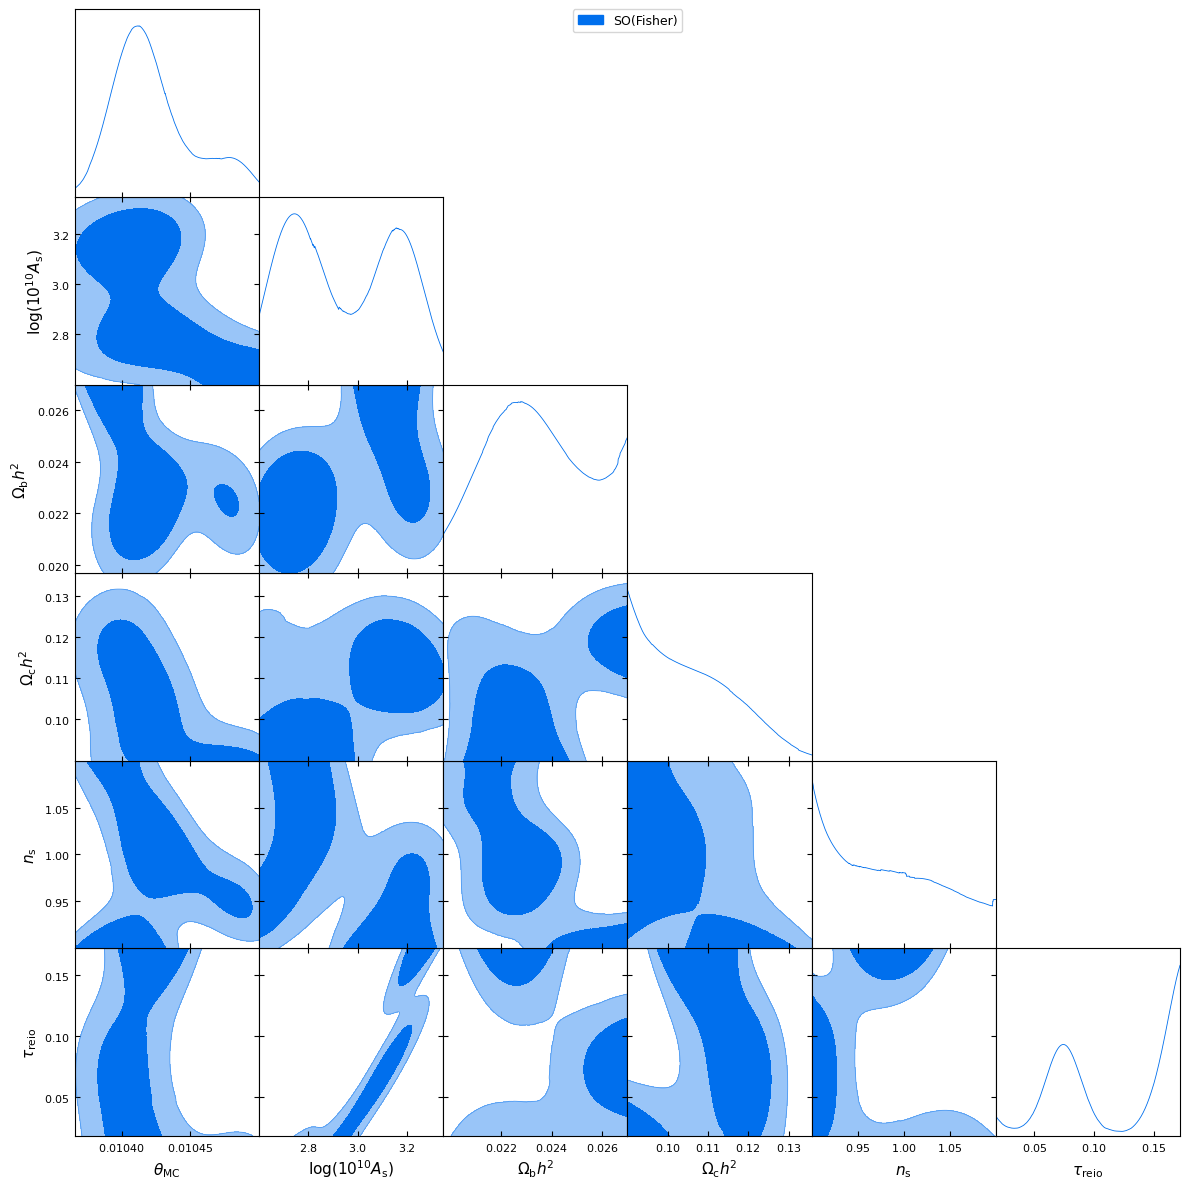

In [21]:
g = plots.get_subplot_plotter()
g.triangle_plot(samp_so_mcmc, par[:6],filled=True,legend_labels = ['SO'])

##### <font color='red'>Exercise{?} 2:</font>
(If we get a chain) Comment on the differences in these two methods of forecasting from the triangle plots

##### <font color='red'>Final Exercise:</font>
1. Compare current Planck+ACT results with SO sensitivity. Make the triangle plot.
2. Do the centers of the plots match? If not why? Fix this!!